In [51]:
import numpy as np
from scipy import linalg
from scipy.integrate import solve_bvp
from scipy.optimize import curve_fit, root, fsolve, minimize_scalar, root_scalar

from scipy.interpolate import interp1d

from scipy.special import zeta

from joblib import Parallel, delayed

from tqdm import tqdm
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 25,
    "text.latex.preamble": r"\usepackage{color}",
})
plt.rcParams["figure.figsize"] = (7, 7)

In [2]:
def process_file(filename):
    X, Y = [], []  # Initialize arrays for X and Y
    with open(filename, "r") as file:
        for line in file:
            line = line.strip()
            if line.startswith('#') or not line:  # Skip comments and empty lines
                continue
            try:
                x, y = map(float, line.split())  # Parse the data as floats
                X.append(x)
                Y.append(y)
            except ValueError:
                print(f"Skipping invalid row: {line}")
    return np.array(X), np.array(Y)


In [53]:
H0_data_1, eta_1 = process_file("eta_on_H_0_d_S=0-2_t=0-2_theta_I=0-02_tildeGamma=0.dat")
H0_data_2, eta_2 = process_file("eta_on_H_0_d_S=0-2_t=0-2_theta_I=0-02_tildeGamma=0-002.dat")
H0_data_3, eta_3 = process_file("eta_on_H_0_d_S=0-2_t=0-2_theta_I=0-02_tildeGamma=0-005.dat")
H0_data_4, eta_4 = process_file("eta_on_H_0_d_S=0-2_t=0-2_theta_I=0-02_tildeGamma=0-01.dat")

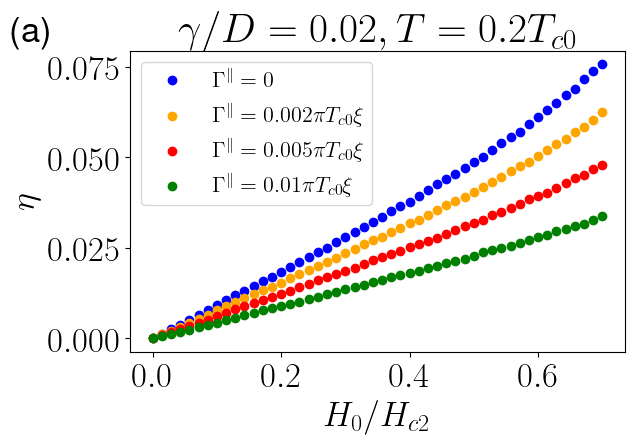

In [75]:
plt.figure(figsize=(7, 5))
plt.scatter(H0_data_1, eta_1, color="blue", label=r"$\Gamma^\parallel=0$")
plt.scatter(H0_data_2, eta_2, color="orange", label=r"$\Gamma^\parallel=0.002 \pi T_{c0} \xi$")
plt.scatter(H0_data_3, eta_3, color="red", label=r"$\Gamma^\parallel=0.005 \pi T_{c0} \xi$")
plt.scatter(H0_data_4, eta_4, color="green", label=r"$\Gamma^\parallel=0.01 \pi T_{c0} \xi$")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$H_0/H_{c2}$")
plt.ylabel(r"$\eta$")
plt.text(-0.22, 0.082, "(a)")
plt.title(r"$\gamma/D=0.02, T = 0.2 T_{c0}$")

plt.tight_layout()
plt.savefig("H0_effect_on_eta.pdf")


In [77]:
tildeGamma_data_1, eta_1 = process_file("eta_on_tildeGamma_d_S=0-2_t=0-2_theta_I=0-02_H0=0-7.dat")
tildeGamma_data_2, eta_2 = process_file("eta_on_tildeGamma_d_S=0-2_t=0-2_theta_I=0-02_H0=0-5.dat")
tildeGamma_data_3, eta_3 = process_file("eta_on_tildeGamma_d_S=0-2_t=0-2_theta_I=0-02_H0=0-3.dat")
tildeGamma_data_4, eta_4 = process_file("eta_on_tildeGamma_d_S=0-2_t=0-2_theta_I=0-02_H0=0-1.dat")

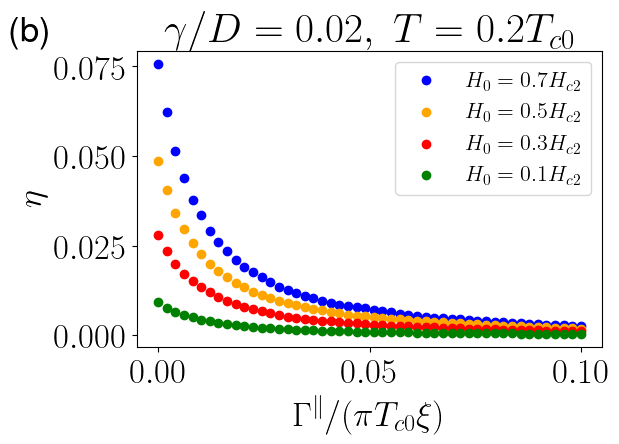

In [93]:
plt.figure(figsize=(7, 5))
plt.scatter(tildeGamma_data_1, eta_1, color="blue", label=r"$H_0=0.7 H_{c2}$")
plt.scatter(tildeGamma_data_2, eta_2, color="orange", label=r"$H_0=0.5 H_{c2}$")
plt.scatter(tildeGamma_data_3, eta_3, color="red", label=r"$H_0=0.3 H_{c2}$")
plt.scatter(tildeGamma_data_4, eta_4, color="green", label=r"$H_0=0.1 H_{c2}$")
plt.legend(loc="upper right", fontsize=16)
plt.xlabel(r"$\Gamma^\parallel/(\pi T_{c0}\xi)$")
plt.ylabel(r"$\eta$")
plt.text(-0.035, 0.082, "(b)")
plt.title(r"$\gamma/D=0.02,\ T = 0.2 T_{c0}$")

plt.tight_layout()
plt.savefig("Gamma_effect_on_eta.pdf")

In [95]:
t_data_1, eta_1 = process_file("eta_on_t_d_S=0-2_tildeGamma=0-002_theta_I=0-01_H0=0-5.dat")
t_data_2, eta_2 = process_file("eta_on_t_d_S=0-2_tildeGamma=0-002_theta_I=0-02_H0=0-5.dat")
t_data_3, eta_3 = process_file("eta_on_t_d_S=0-2_tildeGamma=0-002_theta_I=0-05_H0=0-5.dat")
t_data_4, eta_4 = process_file("eta_on_t_d_S=0-2_tildeGamma=0-002_theta_I=0-1_H0=0-5.dat")


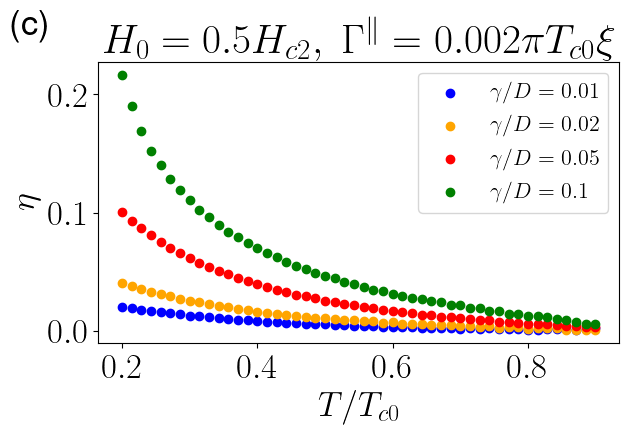

In [105]:
plt.figure(figsize=(7, 5))
plt.scatter(t_data_1, eta_1, color="blue", label=r"$\gamma/D=0.01$")
plt.scatter(t_data_2, eta_2, color="orange", label=r"$\gamma/D=0.02$")
plt.scatter(t_data_3, eta_3, color="red", label=r"$\gamma/D=0.05$")
plt.scatter(t_data_4, eta_4, color="green", label=r"$\gamma/D=0.1$")
#plt.scatter(tildeGamma_data_4, eta_4, color="green", label=r"$\Gamma=0.01 \pi T_{c0} \xi0$")
plt.legend(loc="upper right", fontsize=16)
plt.xlabel(r"$T/T_{c0}$")
plt.ylabel(r"$\eta$")
plt.text(0.035, 0.25, "(c)")
plt.title(r"$H_0 = 0.5 H_{c2},\ \Gamma^\parallel=0.002 \pi T_{c0} \xi$")

plt.tight_layout()
plt.savefig("t_effect_on_eta.pdf")